<a href="https://colab.research.google.com/github/rroszczyk/Python/blob/master/szyfry/szyfry_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# przygotowanie katalogu roboczego do pracy :)
import requests

def pobierzPlik(url, nazwaPliku):
    req = requests.get(url, stream=True)
    with open(nazwaPliku, 'wb') as uchwytPliku:
        for chunk in req.iter_content():
            uchwytPliku.write(chunk)

nazwyPlikow = ['alice.txt', 'pan_tadeusz.txt', 'trojkolorowa-kotka.jpg']
for nazwa in nazwyPlikow:
  pobierzPlik("https://github.com/rroszczyk/Python/raw/master/Pliki/"+nazwa, nazwa)

In [ ]:
def policz_znaki(nazwa_pliku):
  with open(nazwa_pliku) as plik:
    tresc = plik.read()
    tresc = tresc.upper()

  litery = [chr(i) for i in list(range(ord('A'), ord('Z') + 1))]
  slownik = {x: 0 for x in litery}

  cnt = 0
  for t in tresc:
    if (t in slownik):
      slownik[t] = slownik[t] + 1
      cnt = cnt + 1

  for s in slownik:
    slownik[s] = (slownik[s] / cnt) * 100

  print(f'cnt: {cnt} -> {slownik}')

  return(slownik)


cnt: 122989 -> {'A': 7.969818439047395, 'B': 1.419639154721154, 'C': 2.4392425338851442, 'D': 4.446739139272618, 'E': 12.517379603053932, 'F': 1.9367585719048046, 'G': 2.3928969257413266, 'H': 6.414394783273301, 'I': 7.019326931676817, 'J': 0.19107399848766962, 'K': 1.048874289570612, 'L': 4.236964281358495, 'M': 2.005870443698217, 'N': 6.546113880103098, 'O': 7.7055671645431705, 'P': 1.6001431022286547, 'Q': 0.1788777858182439, 'R': 5.374464382993601, 'S': 5.909471578759076, 'T': 9.919586304466254, 'U': 3.234435599931701, 'V': 0.7829968533771313, 'W': 2.400214653342982, 'X': 0.14310222865459513, 'Y': 2.1010009025197376, 'Z': 0.06504646757027052}
Alicja w krainie czarów


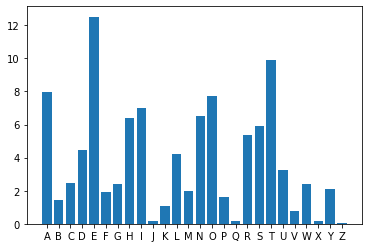

cnt: 322064 -> {'A': 9.82568682001093, 'B': 1.9617218937850862, 'C': 4.563689204630136, 'D': 3.728761985195489, 'E': 7.873900839584678, 'F': 0.1338243330518158, 'G': 1.5931616076307813, 'H': 1.3084355904416514, 'I': 9.35435193005117, 'J': 2.2712876943713054, 'K': 4.045779720800835, 'L': 2.165408117641214, 'M': 3.3723110934472653, 'N': 5.0545854240151025, 'O': 7.329288588603508, 'P': 2.883588355109543, 'Q': 0.0006209945849272194, 'R': 4.907409707387352, 'S': 5.0548959213075655, 'T': 3.6396492622584335, 'U': 2.446408167320781, 'V': 0.003104972924636097, 'W': 4.926350042227632, 'X': 0.0009314918773908292, 'Y': 4.258159868845944, 'Z': 7.296686372894828}
Pan Tadeusz


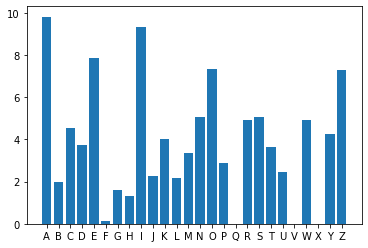

In [ ]:
slownik = policz_znaki('alice.txt')
print('Alicja w krainie czarów')
plt.bar(list(slownik.keys()), slownik.values())
plt.show()

slownik = policz_znaki('pan_tadeusz.txt')
print('Pan Tadeusz')
plt.bar(list(slownik.keys()), slownik.values())
plt.show()

In [ ]:
def kod_cezara(tekst, p):
  wynik = ''
  tekst = tekst.upper()

  for i in range(len(tekst)):
    znak = tekst[i]

    wynik = wynik + chr((ord(znak) + p - ord('A')) % 26 + ord('A'))
  return wynik

In [ ]:
print(kod_cezara("to jest napis", 7))

AVAQLZAAUHWPZ


In [ ]:
for i in range(26):
  print(f'{i} {26-i} {kod_cezara("AVAQLZAAUHWPZ", i)}')

0 26 AVAQLZAAUHWPZ
1 25 BWBRMABBVIXQA
2 24 CXCSNBCCWJYRB
3 23 DYDTOCDDXKZSC
4 22 EZEUPDEEYLATD
5 21 FAFVQEFFZMBUE
6 20 GBGWRFGGANCVF
7 19 HCHXSGHHBODWG
8 18 IDIYTHIICPEXH
9 17 JEJZUIJJDQFYI
10 16 KFKAVJKKERGZJ
11 15 LGLBWKLLFSHAK
12 14 MHMCXLMMGTIBL
13 13 NINDYMNNHUJCM
14 12 OJOEZNOOIVKDN
15 11 PKPFAOPPJWLEO
16 10 QLQGBPQQKXMFP
17 9 RMRHCQRRLYNGQ
18 8 SNSIDRSSMZOHR
19 7 TOTJESTTNAPIS
20 6 UPUKFTUUOBQJT
21 5 VQVLGUVVPCRKU
22 4 WRWMHVWWQDSLV
23 3 XSXNIWXXRETMW
24 2 YTYOJXYYSFUNX
25 1 ZUZPKYZZTGVOY


TEKSTDOZASZYFROWANIAAAA -> TOFNEZRIKAOASSWATZAADYNA

```
TEKSTD
OZASZY
FROWAN
NIAAAA
```

In [ ]:
def skytale(tekst, klucz):
  wynik = ''

  dlugosc = int(len(tekst) / klucz)
  for i in range(klucz):
    for j in range(dlugosc):
      indeks = (j * klucz + (i + 1)) - 1
      wynik = wynik + tekst[indeks]

  print((wynik, dlugosc))

skytale('TEKSTDOZASZYFROWANNIAAAA', 6)

('TOFNEZRIKAOASSWATZAADYNA', 4)


In [ ]:
skytale('TOFNEZRIKAOASSWATZAADYNA', 4)

TEKSTDOZASZYFROWANNIAAAA


In [ ]:
import hashlib

In [ ]:
napis = 'tekst do zakodowania'

sha1 = hashlib.sha1()
sha1.update(bytes(napis, 'utf-8'))
print(f'SHA1: {sha1.hexdigest()}\n')

md5 = hashlib.md5()
md5.update(bytes(napis, 'utf-8'))
print(f'MD5: {md5.hexdigest()}\n')

sha256 = hashlib.sha256();
sha256.update(bytes(napis, 'utf-8'))
print(f'SHA256: {sha256.hexdigest()}\n')

#f96213f67419cda0ff01edce20819835bc134af1
#ee5226ca8a95c2c6ad055332924ca652bea8aff5

SHA1: f96213f67419cda0ff01edce20819835bc134af1

MD5: d37b0aba750dfb57e8fb2c5a0fe409b3

SHA256: 68cdc8b60b6c4a02688a7118a98aaf712cc139d537d8ed9f6b38425babfd6fe4



In [ ]:
import math

In [ ]:
msg = 19
 
p = 3
q = 7
e = 2
 
n = p * q  ## klucz publiczny n oraz e
 
phi = (p - 1) * (q - 1)  

while (e < phi):
  if (math.gcd(e, phi) == 1):
    break
  else:
    e = e + 1

k = 2
d = int((1 + (k * phi)) / e)  ## klucz prywatny d oraz n

print(f"klucz publiczny: {n}, {e}")
print(f"klucz prywanty: {d}, {n}")

def encrypt(msg):
    en = math.pow(msg, e)
    c = int(en % n)
    print("Zakodowana wiadomość: ", c)
    return c

def decrypt(me):
  de = math.pow(me, d)
  c = int(de % n)
  print("Odkodowana wiadomość", c)
  return c

print("Wiadomość oryginalna: ", msg)
c = encrypt(msg)
c = decrypt(c)

klucz publiczny: 21, 5
klucz prywanty: 5, 21
Wiadomość oryginalna:  19
Zakodowana wiadomość:  10
Odkodowana wiadomość 19


In [ ]:
!pip install pycryptodome
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP
from Crypto.Signature.pkcs1_15 import PKCS115_SigScheme
from Crypto.Hash import SHA256
import binascii

     |████████████████████████████████| 2.0 MB 8.5 MB/s 


In [ ]:
keyPair = RSA.generate(1024)

pubKey = keyPair.publickey()
print(f"Public key:  (n={hex(pubKey.n)}, e={hex(pubKey.e)})")
pubKeyPEM = pubKey.exportKey()
print(pubKeyPEM.decode('ascii'))

print(f"Private key: (n={hex(pubKey.n)}, d={hex(keyPair.d)})")
privKeyPEM = keyPair.exportKey()
print(privKeyPEM.decode('ascii'))

Public key:  (n=0xa13ea392a37ab2b7cff531954f590a2e78b4534eba34983aee678135c70eed7e51115588f7e70b30da5e4e283a0359464512e25af49eea2e21e8799725485e5db819bc059d7461de5fcd2a7d1ac911ffca2f5f0254a82dfeea0c2ed8fb465f69c3c8f7fb6ff2af6f50ceb20440c403512c82427ea9954e81d62f9939bc8a9d99, e=0x10001)
-----BEGIN PUBLIC KEY-----
MIGfMA0GCSqGSIb3DQEBAQUAA4GNADCBiQKBgQChPqOSo3qyt8/1MZVPWQoueLRT
Tro0mDruZ4E1xw7tflERVYj35wsw2l5OKDoDWUZFEuJa9J7qLiHoeZclSF5duBm8
BZ10Yd5fzSp9GskR/8ovXwJUqC3+6gwu2PtGX2nDyPf7b/Kvb1DOsgRAxANRLIJC
fqmVToHWL5k5vIqdmQIDAQAB
-----END PUBLIC KEY-----
Private key: (n=0xa13ea392a37ab2b7cff531954f590a2e78b4534eba34983aee678135c70eed7e51115588f7e70b30da5e4e283a0359464512e25af49eea2e21e8799725485e5db819bc059d7461de5fcd2a7d1ac911ffca2f5f0254a82dfeea0c2ed8fb465f69c3c8f7fb6ff2af6f50ceb20440c403512c82427ea9954e81d62f9939bc8a9d99, d=0x2603d996a9da34a6676dfc59a25270b712181987f7188d475f8ba187e73d5abaac2c35094cc0f8ff748c454af09a7782bca83e1b898ea9d16487259b7fdbb6fb6b1b698b7b5b587072a79d72179cb1c4b

In [ ]:
msg = b'tekst do zakodowania'
encryptor = PKCS1_OAEP.new(pubKey)
encrypted = encryptor.encrypt(msg)
print("Zakodowany:", binascii.hexlify(encrypted))

Zakodowany: b'86fb1c1d3d82804a0e4356a1661c01616b60f8b259e5a0207574b4bf29bed86a1c64b386b18c98d6a96a1a37be0778006279dddd837e4790684d613293ca0be304a99983bf01729878d408f9150c36b2311e454671a3620b0755caab51ba158097550515350f1e0da7b4eec4049e0f578c8a6159e73c2273426c84f634be0a81'


In [ ]:
decryptor = PKCS1_OAEP.new(keyPair)
decrypted = decryptor.decrypt(encrypted)
print('Odkodowany:', decrypted)

Odkodowany: b'tekst do zakodowania'


In [ ]:
msg = b'tekst do zakodowania'
hash = SHA256.new(msg)
signer = PKCS115_SigScheme(keyPair)
signature = signer.sign(hash)
print("Podpis:", binascii.hexlify(signature))

msg = b'tekst do zakodowania'
hash = SHA256.new(msg)
signer = PKCS115_SigScheme(keyPair)
try:
    signer.verify(hash, signature)
    print("Podpis jest poprawny")
except:
    print("Podpis jest błędny")

msg = b'podrobiony tekst do zakodowania'
hash = SHA256.new(msg)
signer = PKCS115_SigScheme(keyPair)
try:
    signer.verify(hash, signature)
    print("Podpis jest poprawny")
except:
    print("Podpis jest błędny")

Podpis: b'913509c9e32d4c5d3a66e51a38b904c6f80ede47b483dbffca8a7f624406a8c56cc9e92a6bb2397ab8300dda46e542e0df98358c56aabdb5dfdbebf068475b289d549b0e8527b5949c1d14ca55f0dd39ba3793af8717bac7fc4cdb972df3760d69a11e2a36300665c93fe49d8cf8e1bded4b5e6610ae07552137861c22a49920'
Podpis jest poprawny
Podpis jest błędny
